In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [22]:
# import data
lr_pred = pd.read_csv('results/lr.csv')
pcr_pred = pd.read_csv('results/pcr.csv')
xgb_pred = pd.read_csv('results/xgb.csv')
y_test = pd.read_csv('data/y_test.csv')

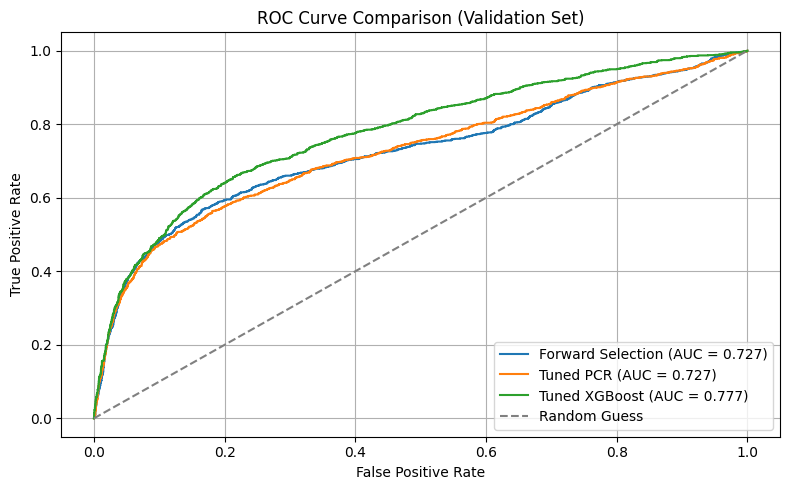

               Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Forward Selection    0.7785   0.499321  0.553881  0.525188  0.726796
1          Tuned PCR    0.7160   0.406266  0.615674  0.489515  0.726935
2      Tuned XGBoost    0.8240   0.690577  0.370008  0.481845  0.777444


In [23]:
preds = {
    "Forward Selection": (lr_pred['predicted'], lr_pred['probability']),
    "Tuned PCR": (pcr_pred['predicted'], pcr_pred['probability']),
    "Tuned XGBoost": (xgb_pred['predicted'], xgb_pred['probability']),
}

results = []
plt.figure(figsize=(8,5))

for name, (predicted, probability) in preds.items():
    acc = accuracy_score(y_test, predicted)
    f1 = f1_score(y_test, predicted)
    precision = precision_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    auc = roc_auc_score(y_test, probability) 

    fpr, tpr, _ = roc_curve(y_test, probability)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    })

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Validation Set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

summary_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(summary_df)